### Exercise 1 (10 points)
In this chapter I said that tuples can be used as keys in dictionaries because they are hashable, and they are hashable because they are immutable. But that is not always true.

If a tuple contains a mutable value, like a list or a dictionary, the tuple is no longer hashable because it contains elements that are not hashable. As an example, here’s a tuple that contains two lists of integers:

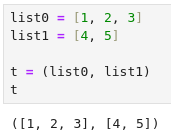

Try to create a dictionary that maps from **`t`** to a string, and confirm that you get a **`TypeError`**.

In [ ]:
t = (tuple([1, 2]), tuple([3, 4]))
my_dict = {t: "value"}
print(my_dict)

### Exercise 2 (10 points)
In this chapter we made a dictionary that maps from each letter to its index in the alphabet:

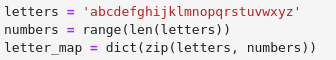

For example, the index of 'a' is 0:

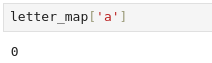

To go in the other direction, we can use list indexing. For example, the letter at index 1 is 'b':

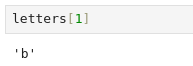

We can use **`letter_map`** and **`letters`** to encode and decode words using a Caesar cipher.

A Caesar cipher is a weak form of encryption that involves shifting each letter by a fixed number of places in the alphabet, wrapping around to the beginning if necessary. For example, 'a' shifted by 2 is 'c', and 'z' shifted by 1 is 'a'.

Write a function called **`shift_word`** that takes as parameters a string and an integer, and returns a new string that contains the letters from the string shifted by the given number of places.

To test your function, confirm that “cheer” shifted by 7 is “jolly,” and “melon” shifted by 16 is “cubed.”

*`Hint`*: use the modulus operator to wrap around from 'z' back to 'a'. Loop through the letters of the word, shift each one, and append the result to a list of letters. Then **`use`** join to concatenate the letters into a string.

In [ ]:
def shift_word(word, shift):
    result = []
    for char in word:
        if char.isalpha():
            base = ord("A") if char.isupper() else ord("a")
            shifted = (ord(char) - base + shift) % 26 + base
            result.append(chr(shifted))
        else:
            result.append(char)
    return "".join(result)


print(shift_word("cheer", 7))  # Kết quả mong đợi: jolly
print(shift_word("melon", 16))  # Kết quả mong đợi: cubed

### Exercise 3 (20 points)
Write a function called **`most_frequent_letters`** that takes a string and prints the letters in decreasing order of frequency.

To get the items in decreasing order, you can use reversed along with sorted or you can pass **`reverse=True`** as a keyword parameter to **`sorted`**.

In [ ]:
def most_frequent_letters(text):
    letter_freq = {}
    for letter in text:
        if letter.isalpha():
            letter = letter.lower()
            letter_freq[letter] = letter_freq.get(letter, 0) + 1
    sorted_letters = sorted(letter_freq.items(), key=lambda x: x[1], reverse=True)
    for letter, freq in sorted_letters:
        print(f"-- {letter}: {freq}", end=" ")


sample_text = "This is a sample English text."
most_frequent_letters(sample_text)

### Exercise 4 (20 points)
In a previous exercise, we tested whether two strings are anagrams by sorting the letters in both words and checking whether the sorted letters are the same. Now let’s make the problem a little more challenging.

We’ll write a program that takes a list of words and prints all the sets of words that are anagrams. Here is an example of what the output might look like:

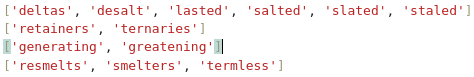

*`Hint`*: for each word in the word list, sort the letters and join them back into a string. Make a dictionary that maps from this sorted string to a list of words that are anagrams of it.

In [ ]:
from collections import defaultdict


def find_anagram_groups(word_list):
    anagram_dict = defaultdict(list)
    for word in word_list:
        sorted_word = "".join(sorted(word))
        anagram_dict[sorted_word].append(word)
    for group in anagram_dict.values():
        if len(group) > 1:
            print(group)


words = [
    "listen",
    "silent",
    "enlist",
    "inlets",
    "google",
    "gogole",
    "evil",
    "vile",
    "veil",
    "live",
]
find_anagram_groups(words)

### Exercise 5 (20 points)
Write a function called **`word_distance`** that takes two words with the same length and returns the number of places where the two words differ.

*`Hint`*: use **`zip`** to loop through the corresponding letters of the words.

In [ ]:
def word_distance(word1, word2):
    if len(word1) != len(word2):
        raise ValueError("Hai từ phải có cùng độ dài.")
    return sum(c1 != c2 for c1, c2 in zip(word1, word2))


print(word_distance("apple", "ammle"))
print(word_distance("hello", "hullo"))
print(word_distance("test", "tent"))
print(word_distance("same", "same"))

### Exercise 6 (20 points)
“Metathesis” is the transposition of letters in a word. Two words form a “metathesis pair” if you can transform one into the other by swapping two letters, like **converse** and **conserve**. Write a program that finds all of the metathesis pairs in the word list.

*`Hint`*: the words in a metathesis pair must be anagrams of each other.

Credit: this exercise is inspired by an example at *http://puzzlers.org.*

In [ ]:
from collections import defaultdict


def find_metathesis_pairs(word_list):
    def is_metathesis_pair(w1, w2):
        diffs = [(c1, c2) for c1, c2 in zip(w1, w2) if c1 != c2]
        return len(diffs) == 2 and diffs[0] == diffs[1][::-1]

    anagram_dict = defaultdict(list)
    for word in word_list:
        key = "".join(sorted(word))
        anagram_dict[key].append(word)

    result = []
    for anagrams in anagram_dict.values():
        for i in range(len(anagrams)):
            for j in range(i + 1, len(anagrams)):
                w1, w2 = anagrams[i], anagrams[j]
                if is_metathesis_pair(w1, w2):
                    result.append((w1, w2))
    return result


words1 = [
    "converse",
    "conserve",
    "listen",
    "silent",
    "enlist",
    "inlets",
    "google",
    "gogole",
]
pairs = find_metathesis_pairs(words1)
for pair in pairs:
    print(pair)